In [32]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
import os
import scipy

# Путь к датасету
train_dir = 'C:/Users/user/Desktop/СПбГУ/Курсач 3/train/train'
val_dir = 'C:/Users/user/Desktop/СПбГУ/Курсач 3/test/test'

In [33]:
# Проверка, что папка существует
print(os.listdir(train_dir))

# Список классов (папок)
for class_name in os.listdir(train_dir):
    print(f"Класс: {class_name}, Количество изображений: {len(os.listdir(os.path.join(train_dir, class_name)))})")

['00', '01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19']
Класс: 00, Количество изображений: 900)
Класс: 01, Количество изображений: 900)
Класс: 02, Количество изображений: 900)
Класс: 03, Количество изображений: 900)
Класс: 04, Количество изображений: 900)
Класс: 05, Количество изображений: 900)
Класс: 06, Количество изображений: 900)
Класс: 07, Количество изображений: 900)
Класс: 08, Количество изображений: 900)
Класс: 09, Количество изображений: 900)
Класс: 10, Количество изображений: 900)
Класс: 11, Количество изображений: 900)
Класс: 12, Количество изображений: 900)
Класс: 13, Количество изображений: 900)
Класс: 14, Количество изображений: 900)
Класс: 15, Количество изображений: 900)
Класс: 16, Количество изображений: 900)
Класс: 17, Количество изображений: 900)
Класс: 18, Количество изображений: 900)
Класс: 19, Количество изображений: 900)


In [34]:
for class_name in os.listdir(val_dir):
    print(f"Класс: {class_name}, Количество изображений: {len(os.listdir(os.path.join(train_dir, class_name)))})")

Класс: 00, Количество изображений: 900)
Класс: 01, Количество изображений: 900)
Класс: 02, Количество изображений: 900)
Класс: 03, Количество изображений: 900)
Класс: 04, Количество изображений: 900)
Класс: 05, Количество изображений: 900)
Класс: 06, Количество изображений: 900)
Класс: 07, Количество изображений: 900)
Класс: 08, Количество изображений: 900)
Класс: 09, Количество изображений: 900)
Класс: 10, Количество изображений: 900)
Класс: 11, Количество изображений: 900)
Класс: 12, Количество изображений: 900)
Класс: 13, Количество изображений: 900)
Класс: 14, Количество изображений: 900)
Класс: 15, Количество изображений: 900)
Класс: 16, Количество изображений: 900)
Класс: 17, Количество изображений: 900)
Класс: 18, Количество изображений: 900)
Класс: 19, Количество изображений: 900)


In [35]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Создание генератора изображений
datagen = ImageDataGenerator(
    rescale=1./255,   # нормализация пикселей
)

train_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(50, 50), # изображения сжимаются для уменьшения сложности
    batch_size=32,
    class_mode='categorical',
    color_mode='grayscale', # изображения черно-белые
)

validation_generator = datagen.flow_from_directory(
    val_dir,
    target_size=(50, 50),
    batch_size=32,
    class_mode='categorical',
    color_mode='grayscale', 
)

Found 18000 images belonging to 20 classes.
Found 6000 images belonging to 20 classes.


In [36]:
model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(50, 50, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    # layers.Conv2D(16, (3, 3), activation='relu'),
    # layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(32, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
    layers.Dense(len(train_generator.class_indices), activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    epochs=10
)

val_loss, val_accuracy = model.evaluate(validation_generator)
print(f"Validation accuracy: {val_accuracy:.4f}")

Epoch 1/10
562/562 [==============================] - 22s 38ms/step - loss: 0.1822 - accuracy: 0.9599 - val_loss: 0.0297 - val_accuracy: 0.9995
Epoch 2/10
562/562 [==============================] - 22s 39ms/step - loss: 0.0255 - accuracy: 0.9991 - val_loss: 0.0321 - val_accuracy: 0.9948
Epoch 3/10
562/562 [==============================] - 22s 38ms/step - loss: 0.0132 - accuracy: 0.9997 - val_loss: 0.0601 - val_accuracy: 0.9851
Epoch 4/10
562/562 [==============================] - 21s 37ms/step - loss: 0.0275 - accuracy: 0.9981 - val_loss: 0.0186 - val_accuracy: 0.9983
Epoch 5/10
562/562 [==============================] - 20s 36ms/step - loss: 0.0079 - accuracy: 1.0000 - val_loss: 0.0116 - val_accuracy: 0.9983
Epoch 6/10
562/562 [==============================] - 20s 36ms/step - loss: 0.0158 - accuracy: 0.9988 - val_loss: 0.0546 - val_accuracy: 0.9858
Epoch 7/10
562/562 [==============================] - 20s 36ms/step - loss: 0.0073 - accuracy: 1.0000 - val_loss: 0.0273 - val_accuracy:

In [38]:
from tensorflow.keras.preprocessing import image

def predict_gesture(img_path):
    img = image.load_img(img_path, target_size=(50, 50), color_mode='grayscale',)
    img_array = image.img_to_array(img) / 255.0  # нормализация
    img_array = np.expand_dims(img_array, axis=0)

    predictions = model.predict(img_array)
    predicted_class = np.argmax(predictions, axis=1)
    return predicted_class

#class_names = ["palm", "l", "fist", "fist_moved", "thumb", "ok", "palm_moved", "c", "down"] # массив названий типов жестов

# Пример предсказания типа жестаа на фото
image_path = 'C:/Users/user/Desktop/СПбГУ/Курсач 3/test/test/03/901.jpg'
gesture_class = predict_gesture(image_path)
print(f"Предсказанный класс жеста: { gesture_class[0] }")

1/1 [==============================] - 0s 97ms/step
Предсказанный класс жеста: 3


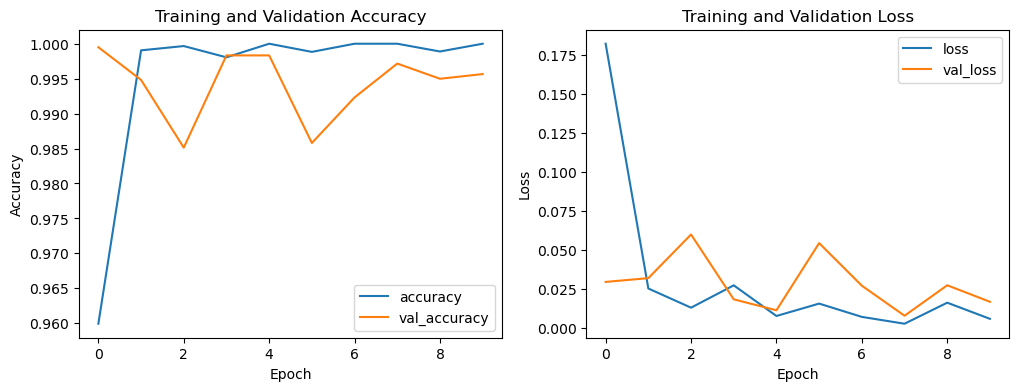

In [39]:
def plot_history(history):
    plt.figure(figsize=(12, 4))

    # Подграфик для точности
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='accuracy')
    plt.plot(history.history['val_accuracy'], label='val_accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    # Подграфик для потерь
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')

    plt.show()

plot_history(history)